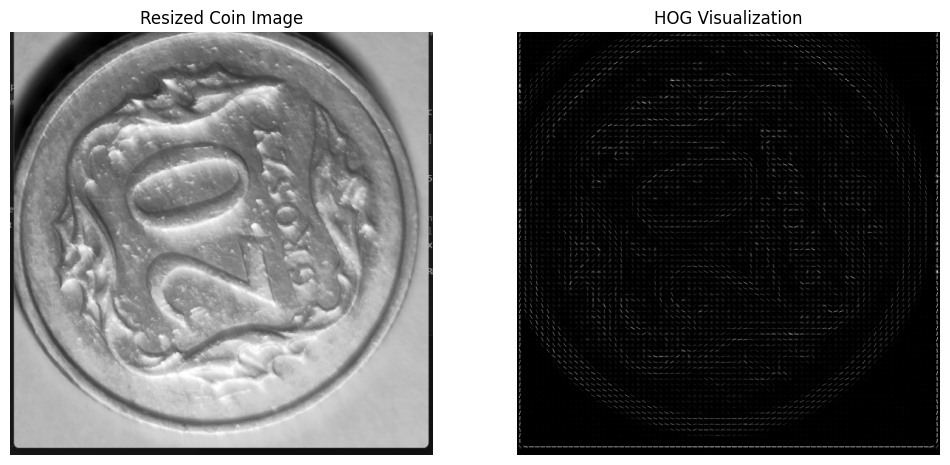

In [34]:
import skimage.io
from skimage.color import rgba2rgb, rgb2gray
from skimage.feature import hog
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare the image
image = skimage.io.imread('data/image.png')

# Convert RGBA to RGB if needed
if image.shape[-1] == 4:
    image = rgba2rgb(image)

# Convert RGB to grayscale
gray_image = rgb2gray(image)

# Resize the image for easier processing (optional step)
resized_image = resize(gray_image, (600, 600))

# Define HOG parameters
radius_bins = 8
angle_bins = 9

# Calculate HOG features
hog_features, hog_image = hog(resized_image, orientations=angle_bins, pixels_per_cell=(radius_bins, radius_bins),
                              cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Display original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_image, cmap=plt.cm.gray)
ax1.set_title('Resized Coin Image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG Visualization')

plt.show()
